 # Plots for 'Data over the Kamb channel'
 
 ## Plan

1. overview map
2. REMA splodge
3. ApRES plot
4. radar map
3. icesat2 dots
4. a. Icesat2 crosssection lower
4. b. Icesat2 crosssection raise
5. a. Icesat1 and REMA crossections
5. b. other icesat1 and REMA

In [1]:
import rasterio as rio
import rasterio.mask
import fiona
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon
import numpy as np
import os
import sys
import glob
import matplotlib.pyplot as plt
from scipy import interpolate
import xarray as xr
from shapely.geometry import Point, LineString, box
import hvplot.xarray  # noqa
import cartopy.crs as crs
import hvplot.pandas
import tarfile

In [84]:
with rio.open('/Users/home/whitefar/DATA/REMOTE_SENSING/MODIS-MOA/moa_mediumlarge_field_area.tif') as image:
    extent_moa = [image.bounds[0],image.bounds[2],image.bounds[1],image.bounds[3]]
    im_moa = image.read(1)/100

In [23]:
REMA_bullseye = gpd.read_file('/Users/home/whitefar/DATA/REMOTE_SENSING/REMA_2m_strips/melt_area_REMA.shp').iloc[0].geometry.exterior.coords.xy

In [5]:
#APRES
df = pd.read_csv('/Users/home/whitefar/CODE/apres/KIS2_ApresResults.csv')
df = df.sort_values('x')
points = [Point(xy) for xy in zip(df.x,df.y) ]
apres_gdf = gpd.GeoDataFrame(df,geometry=points,crs=3031)
del df, points

In [127]:
radarlines_paths = sorted(glob.glob("/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/RES/PROCESSED_LINES_GISFILE/*.shp"))
toremove = ['/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/RES/PROCESSED_LINES_GISFILE/line0KIS1.shp',
            '/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/RES/PROCESSED_LINES_GISFILE/line0bKIS1.shp',
            '/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/RES/PROCESSED_LINES_GISFILE/lineseis34.shp',
            '/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/RES/PROCESSED_LINES_GISFILE/left1011.shp',
            '/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/RES/PROCESSED_LINES_GISFILE/left1213.shp',
            '/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/RES/PROCESSED_LINES_GISFILE/left1415.shp',
            '/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/RES/PROCESSED_LINES_GISFILE/line9.shp',
            '/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/RES/PROCESSED_LINES_GISFILE/right1112.shp',
            '/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/RES/PROCESSED_LINES_GISFILE/right13.shp',
            '/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/RES/PROCESSED_LINES_GISFILE/right1314.shp',
            '/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/RES/PROCESSED_LINES_GISFILE/right910.shp',
            '/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/RES/PROCESSED_LINES_GISFILE/line10.shp',
            '/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/RES/PROCESSED_LINES_GISFILE/line11.shp',
            '/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/RES/PROCESSED_LINES_GISFILE/line12.shp',
            '/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/RES/PROCESSED_LINES_GISFILE/line13.shp',
            '/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/RES/PROCESSED_LINES_GISFILE/line14.shp',]                        
for i in toremove:
    radarlines_paths.remove(i)

radarlines = [gpd.read_file(radarline) for radarline in radarlines_paths]

In [125]:
radarlines.geometry.x

0       -374811.205087
1       -374811.770731
2       -374813.130239
3       -374814.174322
4       -374815.917514
             ...      
19850   -383007.831956
19851   -383010.882771
19852   -383013.671247
19853   -383016.584482
19854   -383017.330190
Length: 19855, dtype: float64

In [28]:
icesat2_df = xr.open_dataset("/Volumes/arc_02/REMOTE_SENSING/ICESAT2/ds_subset_kamb_20200404.nc", engine="h5netcdf").drop_dims(['poly_exponent_x','poly_exponent_y']).to_dataframe().query("x > -382064.5722209641 & x < -374781.1654740692 & y > -734075.0820404041 & y < -722764.4514729496 & cycle_number == 3")

In [74]:
icesat1_path = "/Users/home/whitefar/DATA/REMOTE_SENSING/ICESAT1/shapefiles_of_icesat1_over_channel/"
icesat1_gdf = pd.concat([gpd.read_file(icesat1_path+"track0099smoothpoints.shp"),
                         gpd.read_file(icesat1_path+"track0211smoothpoints.shp") ] )

In [144]:
reference_line =  gpd.read_file("/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/RES/PROCESSED_LINES_GISFILE/linedownchan.shp").iloc[75:-300:15]

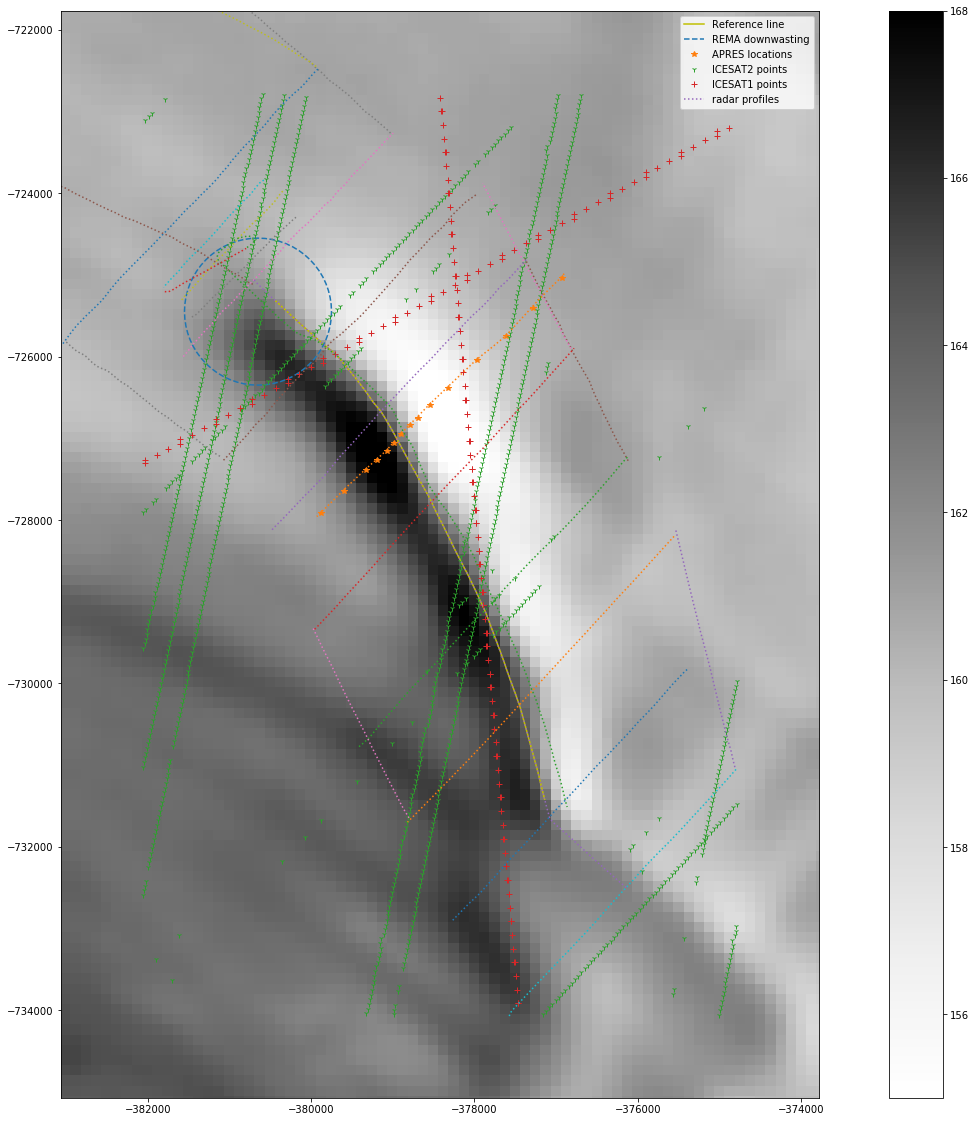

In [149]:
extend_by = 1000

plt.figure(figsize=[25,20])
plt.imshow(im_moa,extent=extent_moa, vmin=155,vmax=168,cmap='Greys')
plt.plot(reference_line.geometry.x,reference_line.geometry.y,'y-',label='Reference line')
plt.plot(REMA_bullseye[0],REMA_bullseye[1],'--',label='REMA downwasting')
plt.plot(apres_gdf.x,apres_gdf.y,'*',label='APRES locations')
plt.plot(icesat2_df.x,icesat2_df.y,'1',label='ICESAT2 points')
plt.plot(icesat1_gdf.x,icesat1_gdf.y,'+',label='ICESAT1 points')
for i,rl in enumerate(radarlines):
    if i ==0:
        plt.plot(rl.geometry.x,rl.geometry.y,':',label='radar profiles')
    else:
        plt.plot(rl.geometry.x,rl.geometry.y,':')
plt.xlim([-382064 - extend_by, -374781 + extend_by])
plt.ylim([-734075.0820404041 - extend_by,-722764.4514729496 + extend_by]) 
plt.legend()
plt.colorbar()
plt.show()

In [129]:
labels

NameError: name 'labels' is not defined

In [64]:
icesat1_gdf_a.x

0     3.360411e+06
1     3.361405e+06
2     3.362730e+06
3     3.364054e+06
4     3.366040e+06
          ...     
91    3.486270e+06
92    3.487594e+06
93    3.489581e+06
94    3.490907e+06
95    3.491902e+06
Name: x, Length: 96, dtype: float64